In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder



pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
RANDOM_STATE = 42


In [2]:
data = pd.read_csv('home-credit-default-risk/application_train.csv')

In [3]:
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
data.describe().round(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,3.075110e+05,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.0,307511.00,307511.0,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.0,307511.00,307511.0,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,1.687979e+05,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.0,0.82,0.2,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,2.371231e+05,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.0,0.38,0.4,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
data.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [7]:
object_columns = data.select_dtypes(include=['object']).columns
for i in object_columns:
    print(data.value_counts(i))
    print("-------------------------------")

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
-------------------------------
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
-------------------------------
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
-------------------------------
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
-------------------------------
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
-------------------------------
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
-------------------

In [8]:
data['CODE_GENDER'] = data['CODE_GENDER'].map({'F': 0, 'M': 1})
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].map({"N":0, "Y":1})
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].map({"N":0, "Y":1})
data['EMERGENCYSTATE_MODE']=data['EMERGENCYSTATE_MODE'].map({"N":0, "Y":1})

In [9]:
object_columns = data.select_dtypes(include=['object']).columns
for i in object_columns:
    print(data.value_counts(i))
    print("-------------------------------")

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
-------------------------------
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
-------------------------------
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
-------------------------------
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64
-------------------------------
NAME_FAMILY_ST

In [10]:
mapping = {
    'Unaccompanied': 'Alone',
    'Family': 'Family',
    'Spouse, partner': 'Family',
    'Children': 'Family',
    'Other_B': 'Other',
    'Other_A': 'Other',
    'Group of people': 'Other'
}
data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE'].map(mapping)

data = pd.get_dummies(data, columns=['NAME_TYPE_SUITE'], dtype=int)



In [11]:
edu_order = {
    'Lower secondary': 1,
    'Secondary / secondary special': 2,
    'Incomplete higher': 3,
    'Higher education': 4,
    'Academic degree': 5
}

data['EDUCATION_LEVEL'] = data['NAME_EDUCATION_TYPE'].map(edu_order)
data = data.drop(["NAME_EDUCATION_TYPE"], axis=1)

In [12]:


data = pd.get_dummies(data, columns=['NAME_FAMILY_STATUS'], dtype=int)
data = data.drop(["NAME_FAMILY_STATUS_Unknown"], axis=1)
data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE_Alone,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Other,EDUCATION_LEVEL,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow
0,100002,1,Cash loans,1.0,0,1,0,202500.0,406597.5,24700.5,351000.0,Working,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",NaN,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,2,0,0,0,1,0
1,100003,0,Cash loans,0.0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,4,0,1,0,0,0
2,100004,0,Revolving loans,1.0,1,1,0,67500.0,135000.0,6750.0,135000.0,Working,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [13]:
object_columns = data.select_dtypes(include=['object']).columns
for i in object_columns:
    print(data.value_counts(i))
    print("-------------------------------")

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
-------------------------------
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
-------------------------------
NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64
-------------------------------
OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            67

In [14]:
data['NAME_CONTRACT_TYPE']=data['NAME_CONTRACT_TYPE'].map({"Cash loans":0, "Revolving loans":1})


object_columns = data.select_dtypes(include=['object']).columns
for i in object_columns:
    print(data.value_counts(i))
    print("-------------------------------")

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
-------------------------------
NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64
-------------------------------
OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Wa

In [15]:
income_mapping = {
    'Working': 'Active_Employment',
    'Commercial associate': 'Active_Employment',
    'State servant': 'Active_Employment',
    'Businessman': 'Active_Employment',
    
    'Pensioner': 'Social_Fixed_Income',
    
    'Unemployed': 'No_Regular_Income',
    'Student': 'No_Regular_Income',
    'Maternity leave': 'No_Regular_Income'
}

data['INCOME_GROUP'] = data['NAME_INCOME_TYPE'].map(income_mapping)

data = pd.get_dummies(data, columns=['NAME_INCOME_TYPE'], dtype=int)

data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE_Alone,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Other,EDUCATION_LEVEL,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,INCOME_GROUP,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working
0,100002,1,0,1.0,0,1,0,202500.0,406597.5,24700.5,351000.0,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",NaN,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,2,0,0,0,1,0,Active_Employment,0,0,0,0,0,0,0,1
1,100003,0,0,0.0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,4,0,1,0,0,0,Active_Employment,0,0,0,0,1,0,0,0
2,100004,0,1,1.0,1

In [16]:
occupation_risk_groups = {
    'High_income_stable': ['Managers', 'Accountants', 'IT staff', 'High skill tech staff'],
    'Medium_income': ['Core staff', 'Sales staff', 'Medicine staff', 'HR staff'],
    'Labor_physical': ['Laborers', 'Drivers', 'Cleaning staff', 'Low-skill Laborers'],
    'Service': ['Cooking staff', 'Waiters/barmen staff', 'Private service staff'],
    'Security': ['Security staff', 'Police', 'Military'],
    'Rare': ['Realty agents', 'Secretaries', 'Other_small']
}

data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].map(income_mapping)

data = pd.get_dummies(data, columns=['OCCUPATION_TYPE'], dtype=int)


In [17]:

object_columns = data.select_dtypes(include=['object']).columns
for i in object_columns:
    print(data.value_counts(i))
    print("-------------------------------")

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64
-------------------------------
WEEKDAY_APPR_PROCESS_START
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: count, dtype: int64
-------------------------------
ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3

In [18]:
dict_housing_type = {
    'House / apartment': 'owner',
    'With parents': 'with_parents',
    'Municipal apartment': 'rent_other',
    'Rented apartment': 'rent_other',
    'Office apartment': 'rent_other',
    'Co-op apartment': 'rent_other'
}

data['HOUSING_TYPE_GROUP'] = data['NAME_HOUSING_TYPE'].map(dict_housing_type)


# ============================================
# 2. WEEKDAY_APPR_PROCESS_START → IS_WEEKEND
# ============================================

dict_weekday = {
    'MONDAY': 0,
    'TUESDAY': 0,
    'WEDNESDAY': 0,
    'THURSDAY': 0,
    'FRIDAY': 0,
    'SATURDAY': 1,
    'SUNDAY': 1
}

data['IS_WEEKEND'] = data['WEEKDAY_APPR_PROCESS_START'].map(dict_weekday)


# ============================================
# 3. FONDKAPREMONT_MODE → FONDKAPREMONT_GROUP
# ============================================

dict_fondkapremont = {
    'reg oper account': 'reg_oper',
    'reg oper spec account': 'reg_oper_spec',
    'not specified': 'other_fond',
    'org spec account': 'other_fond'
}

data['FONDKAPREMONT_GROUP'] = data['FONDKAPREMONT_MODE'].map(dict_fondkapremont)


# ============================================
# 4. HOUSETYPE_MODE → IS_NONSTANDARD_HOUSE
# ============================================

dict_housetype = {
    'block of flats': 0,
    'specific housing': 1,
    'terraced house': 1
}

data['IS_NONSTANDARD_HOUSE'] = data['HOUSETYPE_MODE'].map(dict_housetype)


# ============================================
# 5. WALLSMATERIAL_MODE → WALLS_QUALITY
# ============================================

dict_walls_material = {
    'Panel': 'standard',
    'Stone, brick': 'premium',
    'Block': 'standard',
    'Wooden': 'economy',
    'Mixed': 'economy',
    'Monolithic': 'premium',
    'Others': 'economy'
}

data['WALLS_QUALITY'] = data['WALLSMATERIAL_MODE'].map(dict_walls_material)


# ============================================
# 6. INCOME_GROUP → INCOME_GROUP_MOD
# ============================================

dict_income_group = {
    'Active_Employment': 'active',
    'Social_Fixed_Income': 'social',
    'No_Regular_Income': 'social'  # редкую категорию объединяем
}

data['INCOME_GROUP_MOD'] = data['INCOME_GROUP'].map(dict_income_group)




In [19]:
old_columns = [
    'NAME_HOUSING_TYPE',
    'WEEKDAY_APPR_PROCESS_START',
    'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE',
    'WALLSMATERIAL_MODE',
    'INCOME_GROUP'
]

data = data.drop(columns=old_columns)


# ============================================
# ONE HOT ENCODING (заменяем колонки inplace)
# ============================================

cols_for_ohe = ['HOUSING_TYPE_GROUP', 'FONDKAPREMONT_GROUP', 'WALLS_QUALITY', 'INCOME_GROUP_MOD']

# Создаем dummy и сразу присоединяем к data
data = pd.get_dummies(data, columns=cols_for_ohe, drop_first=True, dtype=int)

In [20]:
# ============================================
# ORGANIZATION_TYPE → ORG_TYPE_GROUP
# ============================================

dict_organization_type = {
    # Бизнес (крупный)
    'Business Entity Type 3': 'business_large',
    'Business Entity Type 2': 'business_large',
    'Business Entity Type 1': 'business_large',
    
    # Бизнес (малый/средний)
    'Self-employed': 'business_small',
    'Trade: type 7': 'business_small',
    'Trade: type 3': 'business_small',
    'Trade: type 2': 'business_small',
    'Trade: type 6': 'business_small',
    'Trade: type 1': 'business_small',
    'Trade: type 4': 'business_small',
    'Trade: type 5': 'business_small',
    'Services': 'business_small',
    'Restaurant': 'business_small',
    'Hotel': 'business_small',
    'Realtor': 'business_small',
    'Advertising': 'business_small',
    'Cleaning': 'business_small',
    'Legal Services': 'business_small',
    
    # Государственные / Силовые структуры
    'Government': 'gov_security',
    'Military': 'gov_security',
    'Police': 'gov_security',
    'Security Ministries': 'gov_security',
    'Security': 'gov_security',
    'Emergency': 'gov_security',
    
    # Социальная сфера / Образование
    'Medicine': 'social_edu',
    'School': 'social_edu',
    'Kindergarten': 'social_edu',
    'University': 'social_edu',
    'Culture': 'social_edu',
    
    # Промышленность / Строительство
    'Construction': 'industry',
    'Industry: type 9': 'industry',
    'Industry: type 3': 'industry',
    'Industry: type 11': 'industry',
    'Industry: type 7': 'industry',
    'Industry: type 1': 'industry',
    'Industry: type 4': 'industry',
    'Industry: type 5': 'industry',
    'Industry: type 2': 'industry',
    'Industry: type 12': 'industry',
    'Industry: type 6': 'industry',
    'Industry: type 10': 'industry',
    'Industry: type 13': 'industry',
    'Industry: type 8': 'industry',
    'Agriculture': 'industry',
    'Electricity': 'industry',
    
    # Транспорт / Связь
    'Transport: type 4': 'transport_telecom',
    'Transport: type 2': 'transport_telecom',
    'Transport: type 3': 'transport_telecom',
    'Transport: type 1': 'transport_telecom',
    'Telecom': 'transport_telecom',
    'Postal': 'transport_telecom',
    'Mobile': 'transport_telecom',
    
    # Финансы / Страхование
    'Bank': 'finance',
    'Insurance': 'finance',
    
    # Прочее / Неизвестно
    'XNA': 'other_unknown',
    'Other': 'other_unknown',
    'Housing': 'other_unknown',
    'Religion': 'other_unknown'
}

data['ORG_TYPE_GROUP'] = data['ORGANIZATION_TYPE'].map(dict_organization_type)
data = pd.get_dummies(data, columns=['ORG_TYPE_GROUP'], drop_first=True, dtype=int)
# Удаляем старую колонку
data = data.drop(columns=['ORGANIZATION_TYPE'])

In [21]:
missing_percent = (data.isna().sum() / len(data) * 100)[lambda x: x != 0]
print(len(missing_percent))
print(missing_percent)

64
CODE_GENDER                       0.001301
AMT_ANNUITY                       0.003902
AMT_GOODS_PRICE                   0.090403
OWN_CAR_AGE                      65.990810
CNT_FAM_MEMBERS                   0.000650
EXT_SOURCE_1                     56.381073
EXT_SOURCE_2                      0.214626
EXT_SOURCE_3                     19.825307
APARTMENTS_AVG                   50.749729
BASEMENTAREA_AVG                 58.515956
YEARS_BEGINEXPLUATATION_AVG      48.781019
YEARS_BUILD_AVG                  66.497784
COMMONAREA_AVG                   69.872297
ELEVATORS_AVG                    53.295980
ENTRANCES_AVG                    50.348768
FLOORSMAX_AVG                    49.760822
FLOORSMIN_AVG                    67.848630
LANDAREA_AVG                     59.376738
LIVINGAPARTMENTS_AVG             68.354953
LIVINGAREA_AVG                   50.193326
NONLIVINGAPARTMENTS_AVG          69.432963
NONLIVINGAREA_AVG                55.179164
APARTMENTS_MODE                  50.749729
BASEMENT

In [22]:
critical_cols = [
    'CODE_GENDER', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', "AMT_GOODS_PRICE",
    "EXT_SOURCE_2", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE",
    "DEF_60_CNT_SOCIAL_CIRCLE"
]

data = data.dropna(subset=critical_cols)  
data = data.drop("EMERGENCYSTATE_MODE",axis=1) 
data['OWN_CAR_AGE']  = data['OWN_CAR_AGE'].fillna(-1)


In [23]:

missing_percent = (data.isna().sum() / len(data) * 100)[lambda x: x != 0]
print(len(missing_percent))
print(missing_percent)
# data.head(5)

52
EXT_SOURCE_1                    56.369522
EXT_SOURCE_3                    19.767233
APARTMENTS_AVG                  50.774855
BASEMENTAREA_AVG                58.539770
YEARS_BEGINEXPLUATATION_AVG     48.806870
YEARS_BUILD_AVG                 66.514150
COMMONAREA_AVG                  69.885547
ELEVATORS_AVG                   53.325740
ENTRANCES_AVG                   50.377527
FLOORSMAX_AVG                   49.789390
FLOORSMIN_AVG                   67.867815
LANDAREA_AVG                    59.394975
LIVINGAPARTMENTS_AVG            68.370857
LIVINGAREA_AVG                  50.219774
NONLIVINGAPARTMENTS_AVG         69.448617
NONLIVINGAREA_AVG               55.207975
APARTMENTS_MODE                 50.774855
BASEMENTAREA_MODE               58.539770
YEARS_BEGINEXPLUATATION_MODE    48.806870
YEARS_BUILD_MODE                66.514150
COMMONAREA_MODE                 69.885547
ELEVATORS_MODE                  53.325740
ENTRANCES_MODE                  50.377527
FLOORSMAX_MODE                 

In [24]:
cols_high_missing = [
    'EXT_SOURCE_1',                 # 56.38%
    'APARTMENTS_AVG',               # 50.75%
    'BASEMENTAREA_AVG',             # 58.52%
    'YEARS_BUILD_AVG',              # 66.50%
    'COMMONAREA_AVG',               # 69.87%
    'ELEVATORS_AVG',                # 53.30%
    'ENTRANCES_AVG',                # 50.35%
    'LANDAREA_AVG',                 # 59.38%
    'LIVINGAPARTMENTS_AVG',         # 68.35%
    'LIVINGAREA_AVG',               # 50.19%
    'NONLIVINGAPARTMENTS_AVG',      # 69.43%
    'NONLIVINGAREA_AVG',            # 55.18%
    'APARTMENTS_MODE',              # 50.75%
    'BASEMENTAREA_MODE',            # 58.52%
    'YEARS_BUILD_MODE',             # 66.50%
    'COMMONAREA_MODE',              # 69.87%
    'ELEVATORS_MODE',               # 53.30%
    'ENTRANCES_MODE',               # 50.35%
    'LANDAREA_MODE',                # 59.38%
    'LIVINGAPARTMENTS_MODE',        # 68.35%
    'LIVINGAREA_MODE',              # 50.19%
    'NONLIVINGAPARTMENTS_MODE',     # 69.43%
    'NONLIVINGAREA_MODE',           # 55.18%
    'APARTMENTS_MEDI',              # 50.75%
    'BASEMENTAREA_MEDI',            # 58.52%
    'YEARS_BUILD_MEDI',             # 66.50%
    'COMMONAREA_MEDI',              # 69.87%
    'ELEVATORS_MEDI',               # 53.30%
    'ENTRANCES_MEDI',               # 50.35%
    'LANDAREA_MEDI',                # 59.38%
    'LIVINGAPARTMENTS_MEDI',        # 68.35%
    'LIVINGAREA_MEDI',              # 50.19%
    'NONLIVINGAPARTMENTS_MEDI',     # 69.43%
    'NONLIVINGAREA_MEDI',           # 55.18%
    'IS_NONSTANDARD_HOUSE',          # 50.18%
    "FLOORSMIN_MEDI",
    "FLOORSMIN_MODE",
    "FLOORSMIN_AVG",
    "YEARS_BEGINEXPLUATATION_AVG",
    "FLOORSMAX_AVG",
    "YEARS_BEGINEXPLUATATION_MODE",
    "FLOORSMAX_MODE",
    "YEARS_BEGINEXPLUATATION_MEDI",
    "FLOORSMAX_MEDI",
    "TOTALAREA_MODE"
    
]
# data = data.drop(cols_high_missing, axis=1)
for i in cols_high_missing:
    #data[i]  = data[i].fillna(data[i].median())
    data[i]  = data[i].fillna(-1)
missing_percent = (data.isna().sum() / len(data) * 100)[lambda x: x != 0]
print(len(missing_percent))
print(missing_percent)



7
EXT_SOURCE_3                  19.767233
AMT_REQ_CREDIT_BUREAU_HOUR    13.474787
AMT_REQ_CREDIT_BUREAU_DAY     13.474787
AMT_REQ_CREDIT_BUREAU_WEEK    13.474787
AMT_REQ_CREDIT_BUREAU_MON     13.474787
AMT_REQ_CREDIT_BUREAU_QRT     13.474787
AMT_REQ_CREDIT_BUREAU_YEAR    13.474787
dtype: float64


In [25]:
col_fill_medians = ["EXT_SOURCE_3","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY",
                    "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT",
                    "AMT_REQ_CREDIT_BUREAU_YEAR"
    
]
for i in col_fill_medians:
    data[i]  = data[i].fillna(data[i].median())

missing_percent = (data.isna().sum() / len(data) * 100)[lambda x: x != 0]
print(len(missing_percent))
print(missing_percent)

0
Series([], dtype: float64)


In [26]:
cols_high_missing = [
"NAME_INCOME_TYPE_Working",
"LIVINGAREA_MODE",
"LIVINGAREA_MEDI",
"APARTMENTS_MEDI",
"APARTMENTS_AVG",
"FLAG_DOCUMENT_3",
"YEARS_BEGINEXPLUATATION_MEDI",
"OBS_30_CNT_SOCIAL_CIRCLE",
"OBS_60_CNT_SOCIAL_CIRCLE",
"APARTMENTS_MODE",
"YEARS_BEGINEXPLUATATION_AVG",
"YEARS_BEGINEXPLUATATION_MODE",
"LANDAREA_AVG",
"LANDAREA_MEDI",
"BASEMENTAREA_AVG",
"BASEMENTAREA_MEDI",
"REGION_RATING_CLIENT_W_CITY",
"LANDAREA_MODE",
"BASEMENTAREA_MODE",
"REGION_RATING_CLIENT",
"NONLIVINGAREA_MEDI",
"NONLIVINGAREA_AVG",
"COMMONAREA_MODE",
"CNT_FAM_MEMBERS",
"NONLIVINGAREA_MODE",
"COMMONAREA_MEDI",
"COMMONAREA_AVG",
"FLAG_OWN_CAR",
"YEARS_BUILD_AVG",
"YEARS_BUILD_MODE",
"LIVINGAPARTMENTS_AVG",
"INCOME_GROUP_MOD_social",
"YEARS_BUILD_MEDI",
"NAME_FAMILY_STATUS_Married",
"FLOORSMAX_AVG",
"LIVINGAPARTMENTS_MODE",
"LIVINGAPARTMENTS_MEDI",
"REG_CITY_NOT_WORK_CITY",
"NAME_CONTRACT_TYPE",
"ENTRANCES_AVG",
"NAME_INCOME_TYPE_Pensioner",
"FLOORSMAX_MEDI",
"ENTRANCES_MEDI",
"FLAG_EMP_PHONE",
"FLOORSMAX_MODE",
"ENTRANCES_MODE",
"ORG_TYPE_GROUP_other_unknown",
"CNT_CHILDREN",
"FLAG_PHONE",
"ELEVATORS_AVG",
"FLAG_OWN_REALTY",
"FLOORSMIN_AVG",
"AMT_REQ_CREDIT_BUREAU_QRT",
"DEF_30_CNT_SOCIAL_CIRCLE",
"ORG_TYPE_GROUP_business_small",
"FLOORSMIN_MEDI",
"ELEVATORS_MEDI",
"FLOORSMIN_MODE",
"FLAG_WORK_PHONE",
"NAME_INCOME_TYPE_Commercial associate",
"ORG_TYPE_GROUP_social_edu",
"NAME_TYPE_SUITE_Alone",
"ELEVATORS_MODE",
"REG_CITY_NOT_LIVE_CITY",
"NONLIVINGAPARTMENTS_AVG",
"NAME_TYPE_SUITE_Family",
"LIVE_CITY_NOT_WORK_CITY",
"AMT_REQ_CREDIT_BUREAU_MON",
"DEF_60_CNT_SOCIAL_CIRCLE",
"NONLIVINGAPARTMENTS_MEDI",
"NAME_FAMILY_STATUS_Single / not married",
"IS_WEEKEND",
"NONLIVINGAPARTMENTS_MODE",
"NAME_INCOME_TYPE_State servant",
"FLAG_DOCUMENT_6",
"WALLS_QUALITY_premium",
"WALLS_QUALITY_standard",
"FLAG_DOCUMENT_8",
"NAME_FAMILY_STATUS_Civil marriage",
"ORG_TYPE_GROUP_gov_security",
"FONDKAPREMONT_GROUP_reg_oper",
"ORG_TYPE_GROUP_industry",
"HOUSING_TYPE_GROUP_rent_other",
"NAME_FAMILY_STATUS_Widow",
"IS_NONSTANDARD_HOUSE",
"NAME_FAMILY_STATUS_Separated",
"HOUSING_TYPE_GROUP_with_parents",
"FLAG_EMAIL",
"REG_REGION_NOT_WORK_REGION",
"ORG_TYPE_GROUP_transport_telecom",
"LIVE_REGION_NOT_WORK_REGION",
"AMT_REQ_CREDIT_BUREAU_WEEK",
"FLAG_DOCUMENT_16",
"FONDKAPREMONT_GROUP_reg_oper_spec",
"FLAG_DOCUMENT_5",
"ORG_TYPE_GROUP_finance",
"REG_REGION_NOT_LIVE_REGION",
"FLAG_DOCUMENT_18",
"FLAG_DOCUMENT_13",
"NAME_TYPE_SUITE_Other",
"AMT_REQ_CREDIT_BUREAU_DAY",
"FLAG_DOCUMENT_9",
"AMT_REQ_CREDIT_BUREAU_HOUR",
"FLAG_DOCUMENT_14",
"FLAG_DOCUMENT_15",
"FLAG_DOCUMENT_7",
"FLAG_DOCUMENT_10",
"FLAG_DOCUMENT_12",
"FLAG_DOCUMENT_11",
"FLAG_DOCUMENT_4",
"FLAG_DOCUMENT_2",
"FLAG_DOCUMENT_17",
"NAME_INCOME_TYPE_Maternity leave",
"NAME_INCOME_TYPE_Businessman",
"NAME_INCOME_TYPE_Unemployed",
"NAME_INCOME_TYPE_Student",
"FLAG_DOCUMENT_21",
"FLAG_DOCUMENT_19",
"FLAG_DOCUMENT_20",
"FLAG_MOBIL",
"FLAG_CONT_MOBILE"
    
]
data = data.drop(cols_high_missing, axis=1)
missing_percent = (data.isna().sum() / len(data) * 100)[lambda x: x != 0]
print(len(missing_percent))
print(missing_percent)

0
Series([], dtype: float64)


Найдено числовых колонок: 22. Начинаем построение...



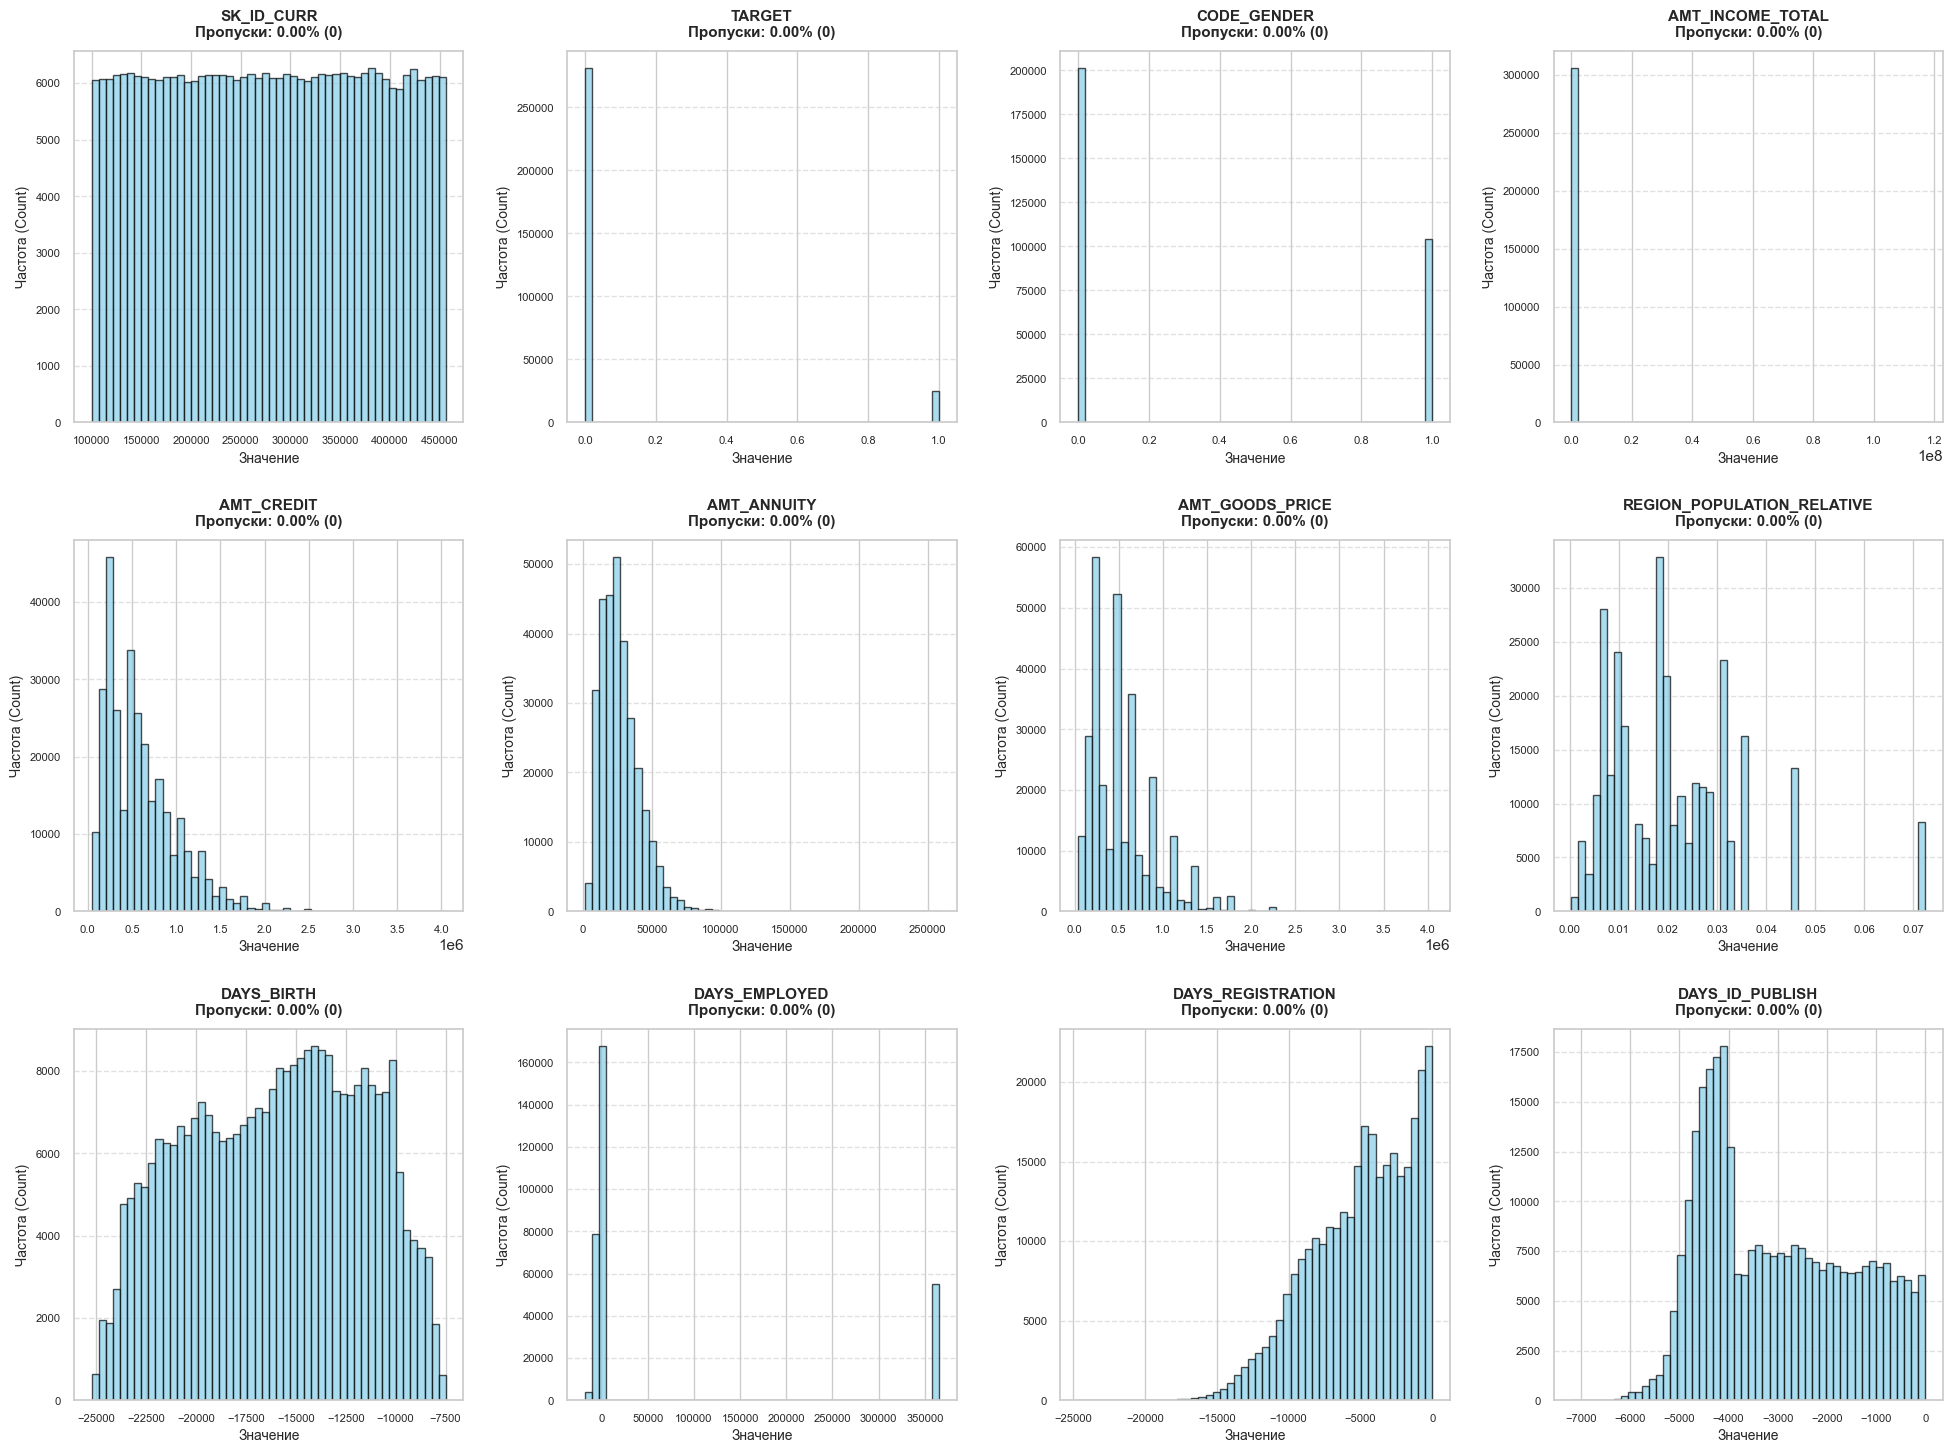

--- Отображена фигура 1 из 2 ---



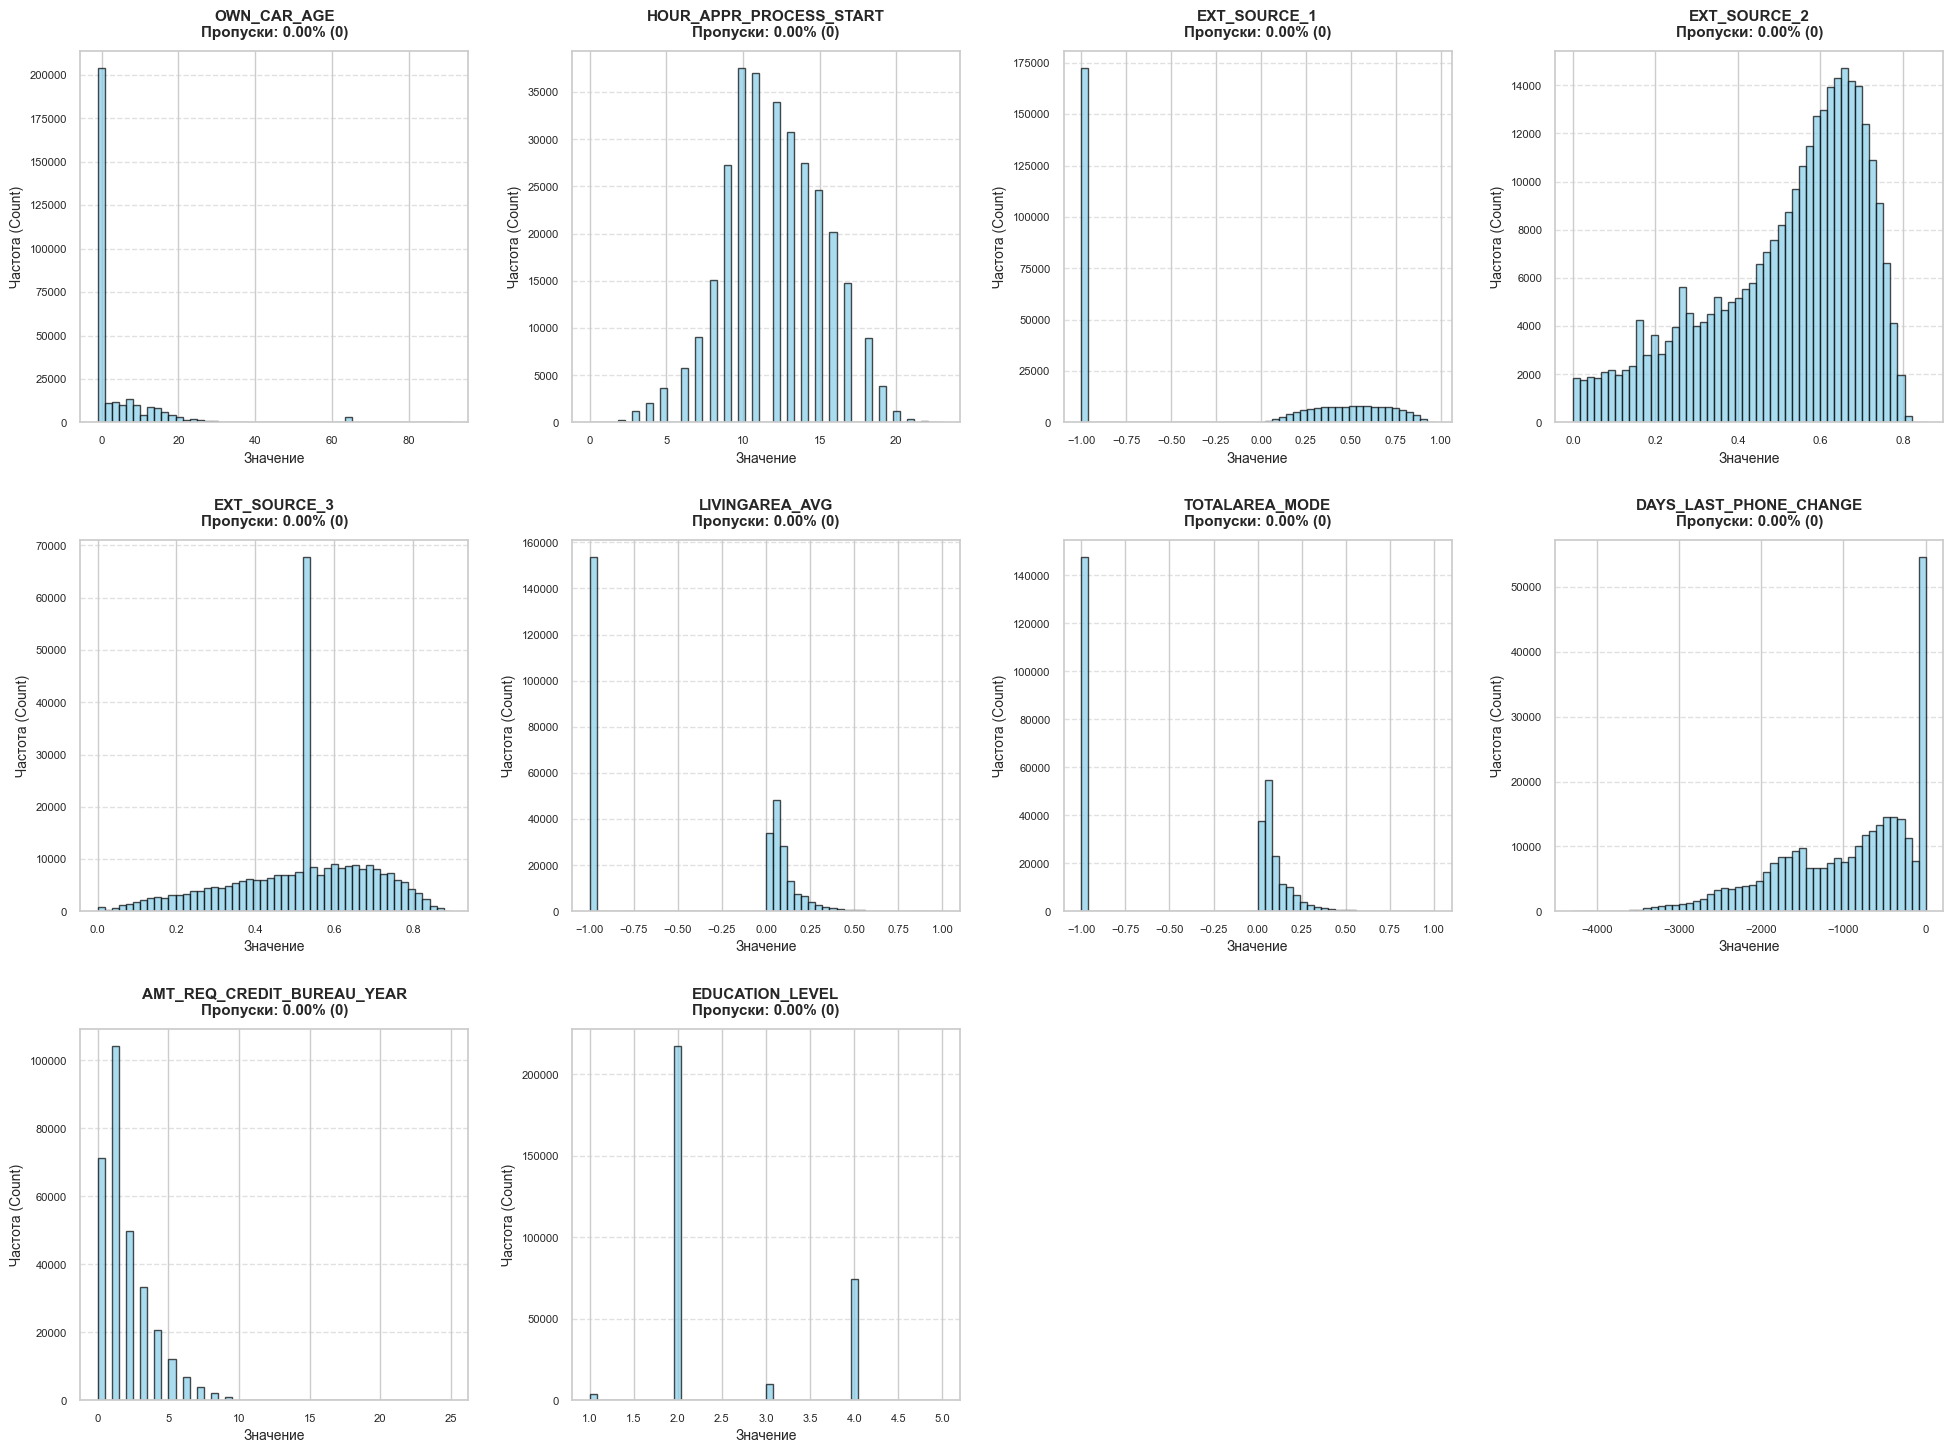

--- Отображена фигура 2 из 2 ---



In [27]:

def plot_numerical_with_missing(df, charts_per_figure=12, bins=30):
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if not num_cols:
        print("Числовые колонки не найдены.")
        return

    print(f"Найдено числовых колонок: {len(num_cols)}. Начинаем построение...\n")

    chunks = [num_cols[i:i + charts_per_figure] for i in range(0, len(num_cols), charts_per_figure)]
    
    sns.set_theme(style="whitegrid", context="notebook")

    for chunk_idx, cols_chunk in enumerate(chunks):
        n_plots = len(cols_chunk)
        n_cols = 4 if n_plots >= 4 else n_plots
        n_rows = (n_plots + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
        if n_plots == 1:
            axes = [axes]
        else:
            axes = axes.flatten()
            
        total_rows = len(df)

        for i, col in enumerate(cols_chunk):
            try:
                missing_count = df[col].isna().sum()
                missing_percent = (missing_count / total_rows) * 100
                clean_data = df[col].dropna()

                color = "skyblue" if missing_percent < 50 else "salmon"

                axes[i].hist(clean_data, bins=bins, color=color, edgecolor='black', alpha=0.7)
                
                axes[i].set_ylabel("Частота (Count)", fontsize=10)
                axes[i].set_xlabel("Значение", fontsize=10)
                axes[i].grid(True, axis='y', linestyle='--', alpha=0.6)
                axes[i].tick_params(labelsize=8)
                
                title_text = f"{col}\nПропуски: {missing_percent:.2f}% ({missing_count:,})"
                axes[i].set_title(title_text, fontsize=11, pad=10, fontweight='bold')
                
                if len(clean_data) == 0:
                    axes[i].text(0.5, 0.5, "Нет данных для отображения", 
                                 transform=axes[i].transAxes, ha='center', va='center', color='red')
                
            except Exception as e:
                axes[i].text(0.5, 0.5, f"Ошибка:\n{str(e)}", transform=axes[i].transAxes, 
                             ha='center', va='center', color='red', fontsize=9, bbox=dict(facecolor='white', alpha=0.8))
                axes[i].set_title(f"{col} (Error)", fontsize=10, color='red')
                axes[i].axis('off')

        for j in range(n_plots, len(axes)):
            fig.delaxes(axes[j])
            
        plt.tight_layout(pad=2.0)
        plt.show()
        print(f"--- Отображена фигура {chunk_idx + 1} из {len(chunks)} ---\n")

plot_numerical_with_missing(data, charts_per_figure=12, bins=50)

In [28]:
data.describe()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,LIVINGAREA_AVG,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,EDUCATION_LEVEL
count,305541.000000,305541.000000,305541.000000,3.055410e+05,3.055410e+05,305541.000000,3.055410e+05,305541.000000,305541.000000,305541.000000,305541.000000,305541.000000,305541.000000,305541.000000,305541.000000,3.055410e+05,305541.000000,305541.000000,305541.000000,305541.000000,305541.000000,305541.000000
mean,278178.385703,0.080893,0.341830,1.687139e+05,6.000801e+05,27144.709314,5.389469e+05,0.020847,-16038.658697,63822.590664,-4985.056412,-2994.772623,3.446186,12.061134,-0.344694,5.142606e-01,0.515581,-0.448775,-0.429988,-963.778665,1.780622,2.508272
std,102783.922398,0.272671,0.474324,2.375894e+05,4.027073e+05,14481.482802,3.695835e+05,0.013810,4362.959548,141282.791719,3522.211378,1509.243287,9.313307,3.265666,0.757787,1.911044e-01,0.174808,0.559113,0.556291,827.166526,1.766079,0.873887
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-1.000000,0.000000,-1.000000,8.173617e-08,0.000527,-1.000000,-1.000000,-4292.000000,0.000000,1.000000
25%,189150.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16573.500000,2.385000e+05,0.010006,-19681.000000,-2761.000000,-7477.000000,-4299.000000,-1.000000,10.000000,-1.000000,3.922228e-01,0.417100,-1.000000,-1.000000,-1571.000000,1.000000,2.000000
50%,278202.000000,0.000000,0.000000,1.485000e+05,5.175000e+05,24939.000000,4.500000e+05,0.018850,-15752.000000,-1214.000000,-4503.000000,-3255.000000,-1.000000,12.000000,-1.000000,5.658218e-01,0.535276,-1.000000,0.004900,-758.000000,1.000000,2.000000
75%,367137.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34636.500000,6.795000e+05,0.028663,-12415.000000,-289.000000,-2009.000000,-1721.000000,5.000000,14.000000,0.456209,6.635585e-01,0.636376,0.074000,0.070300,-274.000000,3.000000,3.000000
max,456255.000000,1.000000,1.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,91.000000,23.000000,0.962693,8.549997e-01,0.896010,1.000000,1.000000,0.000000,25.000000,5.000000


In [29]:
data.head(3)
y = data['TARGET']
X = data.drop('TARGET', axis=1)
col = data.columns.drop("TARGET")

In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, roc_auc_score, average_precision_score

results = {}

def evaluate_model(name, model, X_tr, X_te, y_tr, y_te, scaled=False):
    """Обучить, предсказать, сохранить результаты."""
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    
    # --- Получаем scores для ROC-AUC и PR ---
    if hasattr(model, "predict_proba"):
        # Для KNN, RandomForest, LogisticRegression
        y_scores = model.predict_proba(X_te)[:, 1]
    elif hasattr(model, "decision_function"):
        # Для SVM (LinearSVC, SVC)
        y_scores = model.decision_function(X_te)
    else:
        # Fallback (не должно случиться)
        y_scores = y_pred.astype(float)
    
    # --- Метрики ---
    acc = accuracy_score(y_te, y_pred)
    f1 = f1_score(y_te, y_pred, average='macro')
    
    # ROC-AUC (правильно — на scores)
    auc = roc_auc_score(y_te, y_scores)
    
    # PR-кривая и PR-AUC (правильно — на scores)
    precision, recall, thresholds = precision_recall_curve(y_te, y_scores)
    pr_auc = average_precision_score(y_te, y_scores)  # или auc(recall, precision)
    
    # --- Сохраняем всё ---
    results[name] = {
        'accuracy': acc, 
        'f1_macro': f1,
        'roc_auc': auc,
        'pr_auc': pr_auc,
        'precision': precision,  # массивы для кривой
        'recall': recall,
        'thresholds': thresholds
    }
    
    print(f'{name}: accuracy={acc:.4f}, F1-macro={f1:.4f}, ROC-AUC={auc:.4f}, PR-AUC={pr_auc:.4f}')
    
    # Дополнительно: confusion matrix для анализа
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_te, y_pred)
    print(f'Confusion matrix:\n{cm}\n')
    
    return y_pred

In [31]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# gnb = GaussianNB()
# y_pred_nb = evaluate_model('GaussianNB', gnb, X_train_sc, X_test_sc, y_train, y_test)

# print(classification_report(y_test, y_pred_nb))

In [32]:
# from sklearn.metrics import ConfusionMatrixDisplay


# fig, ax = plt.subplots(figsize=(7, 5))
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, ax=ax, cmap='Blues')
# ax.set_title('Gaussian Naive Bayes — Confusion Matrix')
# plt.tight_layout()
# plt.show()

In [33]:
# proba_nb = gnb.predict_proba(X_test_sc)
# print('Пример предсказанных вероятностей (первые 5 объектов):')
# print(pd.DataFrame(proba_nb[:5]).round(4))
# print(f'\nСредняя максимальная уверенность: {proba_nb.max(axis=1).mean():.3f}')

In [34]:
# from sklearn.neighbors import KNeighborsClassifier

# # Подбор оптимального K
# k_range = [1, 3, 5, 7, 11, 15, 21, 31, 51]
# cv_scores = []

# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train_sc, y_train, cv=5, scoring='accuracy', n_jobs=-1)
#     cv_scores.append(scores.mean())
#     print(f'K={k:3d}: CV accuracy = {scores.mean():.4f} ± {scores.std():.4f}')

# best_k = k_range[np.argmax(cv_scores)]
# print(f'\nЛучший K = {best_k}')

# K=  1: CV accuracy = 0.8593 ± 0.0019
# K=  3: CV accuracy = 0.9042 ± 0.0003
# K=  5: CV accuracy = 0.9143 ± 0.0003
# K=  7: CV accuracy = 0.9175 ± 0.0003
# K= 11: CV accuracy = 0.9187 ± 0.0001
# K= 15: CV accuracy = 0.9190 ± 0.0001
# K= 21: CV accuracy = 0.9191 ± 0.0000
# K= 31: CV accuracy = 0.9191 ± 0.0000
# K= 51: CV accuracy = 0.9191 ± 0.0000

# Лучший K = 31 А то она обучается 20 лет...

In [35]:
# fig, ax = plt.subplots(figsize=(8, 5))
# ax.plot(k_range, cv_scores, 'b-o', linewidth=2, markersize=8)
# ax.axvline(x=best_k, color='red', linestyle='--', label=f'Best K={best_k}')
# ax.set_xlabel('K (число соседей)')
# ax.set_ylabel('CV Accuracy')
# ax.set_title('KNN: выбор K по кросс-валидации')
# ax.legend()
# plt.tight_layout()
# plt.show()

In [36]:
# knn_best = KNeighborsClassifier(n_neighbors=best_k)
# y_pred_knn = evaluate_model('KNN', knn_best, X_train_sc, X_test_sc, y_train, y_test)
# print(classification_report(y_test, y_pred_knn))

In [37]:
# from sklearn.svm import SVC, LinearSVC

# # SVM на подвыборке (полный датасет слишком большой для RBF SVM)
# # Берём 10K для быстроты
# np.random.seed(42)
# idx_sub = np.random.choice(len(X_train_sc), size=10000, replace=False)
# X_train_sub = X_train_sc[idx_sub]
# y_train_sub = y_train.iloc[idx_sub].reset_index(drop=True)

# # Линейный SVM
# linear_svm = LinearSVC(C=1.0, max_iter=5000,class_weight='balanced', random_state=RANDOM_STATE)
# y_pred_lsvm = evaluate_model('LinearSVM', linear_svm, X_train_sub, X_test_sc, y_train_sub, y_test)

# # RBF SVM
# rbf_svm = SVC(kernel='rbf', C=10, gamma='scale',class_weight='balanced', random_state=RANDOM_STATE)
# y_pred_rsvm = evaluate_model('RBF-SVM', rbf_svm, X_train_sub, X_test_sc, y_train_sub, y_test)

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight={0: 1, 1: 10},  
    max_depth=20,           
    min_samples_split=184,
    min_samples_leaf=70,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
y_pred_rf = evaluate_model('RandomForest', rf, X_train, X_test, y_train, y_test)

print(classification_report(y_test, y_pred_rf))


# Запуск поиска лучших параметров...
# Fitting 3 folds for each of 20 candidates, totalling 60 fits
# [Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
# [Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
# [Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    9.4s
# Лучшие параметры найдены:
# {'class_weight': {0: 1, 1: 10}, 'max_depth': 20, 'min_samples_leaf': 70, 'min_samples_split': 184}
# [Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   16.8s finished


# RandomForest: accuracy=0.7871, F1-macro=0.5800, ROC-AUC=0.7464, PR-AUC=0.2253
# Confusion matrix:
# [[45508 10658]
#  [ 2350  2593]]

#               precision    recall  f1-score   support

#            0       0.95      0.81      0.87     56166
#            1       0.20      0.52      0.29      4943

#     accuracy                           0.79     61109
#    macro avg       0.57      0.67      0.58     61109
# weighted avg       0.89      0.79      0.83     61109



KeyboardInterrupt: 

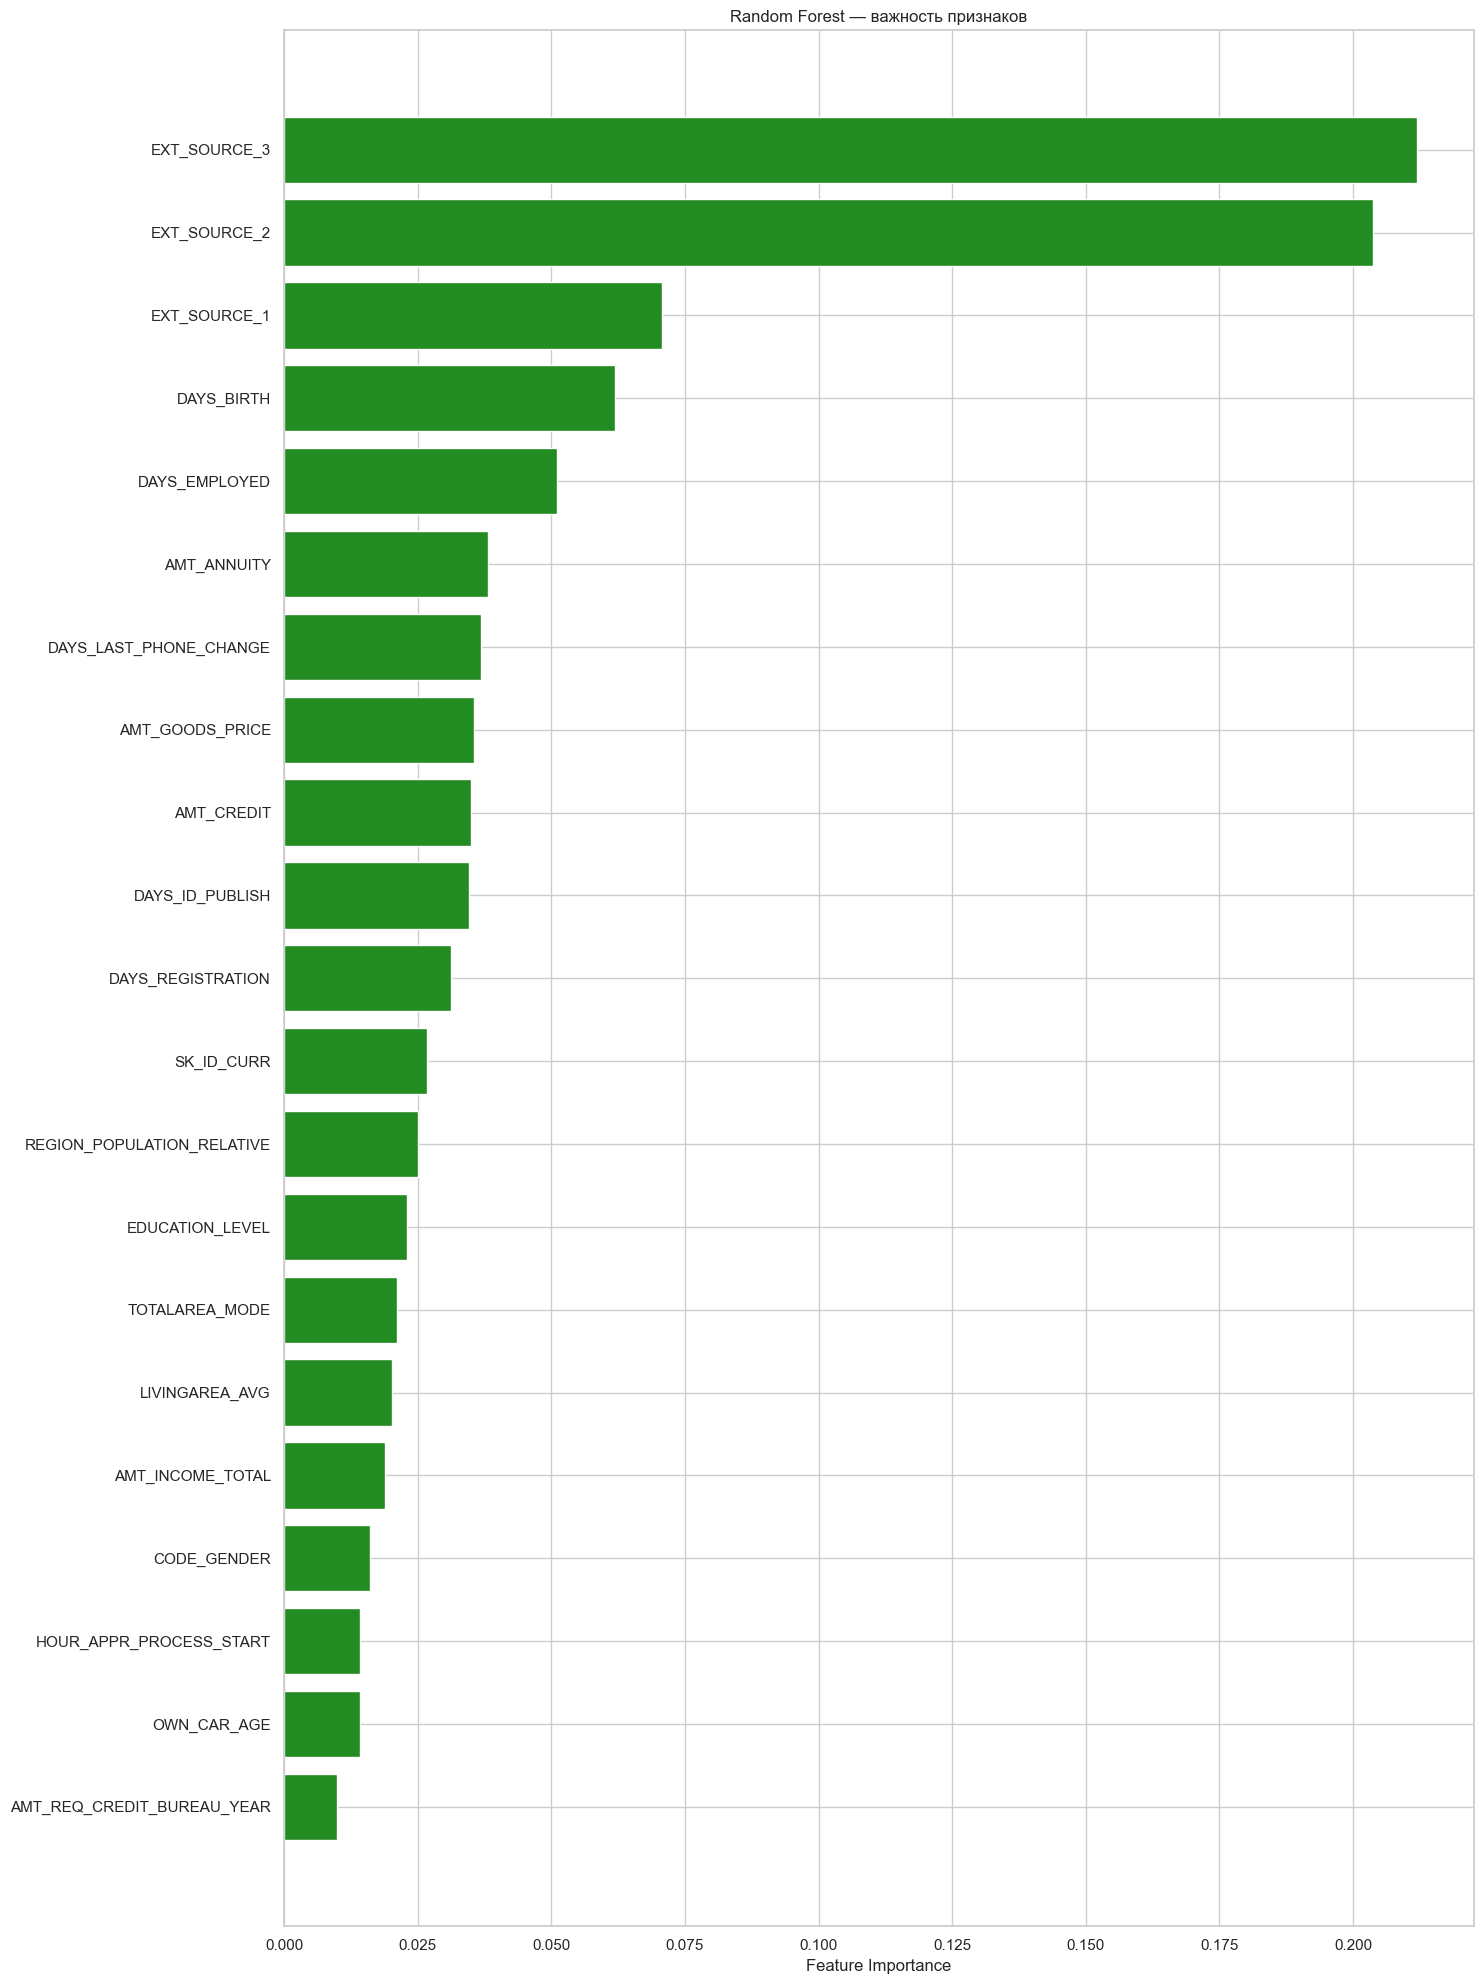

In [ ]:
# Feature importance (Random Forest)
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)

fig, ax = plt.subplots(figsize=(15, 20))
ax.barh(range(len(importances)), importances[sorted_idx], color='forestgreen')
ax.set_yticks(range(len(importances)))
ax.set_yticklabels(np.array(col)[sorted_idx])
ax.set_xlabel('Feature Importance')
ax.set_title('Random Forest — важность признаков')
plt.tight_layout()
plt.show()

In [ ]:
importances = rf.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'f{i}' for i in range(X_train.shape[1])]

# Сортируем
indices = np.argsort(importances)[::-1]

# Топ-10 важных
print("Топ-10 важных признаков:")
for i in range(20):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

importances = rf.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'f{i}' for i in range(X_train.shape[1])]



# Топ-10 важных признаков:  При удалении призноков
# 1. EXT_SOURCE_3: 0.1673
# 2. EXT_SOURCE_2: 0.1536
# 3. DAYS_BIRTH: 0.0523
# 4. DAYS_EMPLOYED: 0.0505
# 5. DAYS_LAST_PHONE_CHANGE: 0.0440
# 6. AMT_CREDIT: 0.0406
# 7. AMT_ANNUITY: 0.0395
# 8. AMT_GOODS_PRICE: 0.0393
# 9. DAYS_ID_PUBLISH: 0.0389
# 10. DAYS_REGISTRATION: 0.0351
# 11. SK_ID_CURR: 0.0317
# 12. REGION_POPULATION_RELATIVE: 0.0287
# 13. EDUCATION_LEVEL: 0.0237
# 14. AMT_INCOME_TOTAL: 0.0233
# 15. HOUR_APPR_PROCESS_START: 0.0187
# 16. CODE_GENDER: 0.0154
# 17. OWN_CAR_AGE: 0.0136
# 18. AMT_REQ_CREDIT_BUREAU_YEAR: 0.0125
# 19. NAME_INCOME_TYPE_Working: 0.0102
# 20. OBS_30_CNT_SOCIAL_CIRCLE: 0.0099
# 21. OBS_60_CNT_SOCIAL_CIRCLE: 0.0098
# 22. FLAG_DOCUMENT_3: 0.0089
# 23. REGION_RATING_CLIENT_W_CITY: 0.0085
# 24. REGION_RATING_CLIENT: 0.0074
# 25. CNT_FAM_MEMBERS: 0.0063
# 26. FLAG_OWN_CAR: 0.0058
# 27. NAME_FAMILY_STATUS_Married: 0.0055
# 28. NAME_CONTRACT_TYPE: 0.0054
# 29. WALLS_QUALITY_standard: 0.0052
# 30. REG_CITY_NOT_WORK_CITY: 0.0051


#При медиане
# Топ-10 важных признаков:
# 1. EXT_SOURCE_3: 0.1416
# 2. EXT_SOURCE_2: 0.1283
# 3. EXT_SOURCE_1: 0.0505
# 4. DAYS_BIRTH: 0.0405
# 5. DAYS_EMPLOYED: 0.0390
# 6. DAYS_LAST_PHONE_CHANGE: 0.0326
# 7. AMT_GOODS_PRICE: 0.0298
# 8. AMT_CREDIT: 0.0297
# 9. DAYS_ID_PUBLISH: 0.0291
# 10. AMT_ANNUITY: 0.0286
# 11. DAYS_REGISTRATION: 0.0257
# 12. SK_ID_CURR: 0.0218
# 13. REGION_POPULATION_RELATIVE: 0.0201
# 14. EDUCATION_LEVEL: 0.0179
# 15. AMT_INCOME_TOTAL: 0.0158
# 16. HOUR_APPR_PROCESS_START: 0.0124
# 17. CODE_GENDER: 0.0122
# 18. OWN_CAR_AGE: 0.0100
# 19. TOTALAREA_MODE: 0.0087
# 20. AMT_REQ_CREDIT_BUREAU_YEAR: 0.0085

# При -1 в датасет
# Топ-10 важных признаков:
# 1. EXT_SOURCE_3: 0.1399
# 2. EXT_SOURCE_2: 0.1256
# 3. EXT_SOURCE_1: 0.0544
# 4. DAYS_BIRTH: 0.0411
# 5. DAYS_EMPLOYED: 0.0387
# 6. DAYS_LAST_PHONE_CHANGE: 0.0316
# 7. AMT_CREDIT: 0.0292
# 8. AMT_GOODS_PRICE: 0.0290
# 9. DAYS_ID_PUBLISH: 0.0284
# 10. AMT_ANNUITY: 0.0277
# 11. DAYS_REGISTRATION: 0.0249
# 12. SK_ID_CURR: 0.0217
# 13. REGION_POPULATION_RELATIVE: 0.0193
# 14. EDUCATION_LEVEL: 0.0166
# 15. AMT_INCOME_TOTAL: 0.0156
# 16. HOUR_APPR_PROCESS_START: 0.0121
# 17. CODE_GENDER: 0.0114
# 18. OWN_CAR_AGE: 0.0096
# 19. TOTALAREA_MODE: 0.0091
# 20. LIVINGAREA_AVG: 0.0083


Топ-10 важных признаков:
1. f15: 0.2120
2. f14: 0.2038
3. f13: 0.0707
4. f7: 0.0618
5. f8: 0.0511
6. f4: 0.0381
7. f18: 0.0369
8. f5: 0.0355
9. f3: 0.0350
10. f10: 0.0347
11. f9: 0.0312
12. f0: 0.0268
13. f6: 0.0250
14. f20: 0.0229
15. f17: 0.0211
16. f16: 0.0201
17. f2: 0.0189
18. f1: 0.0161
19. f12: 0.0142
20. f11: 0.0142


In [ ]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 10}, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 70, 'min_samples_split': 184, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]  # сортировка от лучшего к худшему

# Создаем список строк с кавычками
features_list = [f'"{col[i]}"' for i in sorted_idx]

# Выводим в колонку
print(",\n".join(features_list))

"EXT_SOURCE_3",
"EXT_SOURCE_2",
"EXT_SOURCE_1",
"DAYS_BIRTH",
"DAYS_EMPLOYED",
"AMT_ANNUITY",
"DAYS_LAST_PHONE_CHANGE",
"AMT_GOODS_PRICE",
"AMT_CREDIT",
"DAYS_ID_PUBLISH",
"DAYS_REGISTRATION",
"SK_ID_CURR",
"REGION_POPULATION_RELATIVE",
"EDUCATION_LEVEL",
"TOTALAREA_MODE",
"LIVINGAREA_AVG",
"AMT_INCOME_TOTAL",
"CODE_GENDER",
"HOUR_APPR_PROCESS_START",
"OWN_CAR_AGE",
"AMT_REQ_CREDIT_BUREAU_YEAR"


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# from sklearn.ensemble import RandomForestClassifier
# from scipy.stats import randint, uniform
# import numpy as np

# # Предполагаем, что X и y у вас уже разделены
# # X = data.drop('TARGET', axis=1)
# # y = data['TARGET']

# # Базовая модель
# rf = RandomForestClassifier(
#     n_estimators=300,
#     class_weight={0: 1, 1: 15},  # Базовый вес, который будем варьировать
#     max_depth=None,
#     min_samples_split=100,
#     min_samples_leaf=50,
#     max_features='sqrt',
#     random_state=42,
#     n_jobs=-1,
#     verbose=1
# )

# # Параметры для перебора
# param_dist = {
#     'min_samples_split': randint(50, 500),       # От 50 до 500
#     'min_samples_leaf': randint(20, 200),        # От 20 до 200
#     'max_depth': [None, 10, 20, 30, 40, 50],     # None или конкретные значения
#     'class_weight': [{0: 1, 1: 10}, 
#                      {0: 1, 1: 15}, 
#                      {0: 1, 1: 20}, 
#                      {0: 1, 1: 25}, 
#                      {0: 1, 1: 30}]              # Меняем только вес класса 1
# }

# # Настройка кросс-валидации
# # Для большого датасета лучше использовать 3 или 5 фолд и n_iter=10-20 для скорости
# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=20,                # Количество комбинаций параметров для проверки (увеличьте до 50-100, если есть время)
#     scoring='roc_auc',        # Метрика качества (для дисбаланса классов ROC-AUC предпочтительнее Accuracy)
#     cv=cv,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1                 # Используем все ядра процессора
# )

# # Запуск поиска
# print("Запуск поиска лучших параметров...")
# random_search.fit(X, y)

# # Вывод лучших параметров
# print("Лучшие параметры найдены:")
# print(random_search.best_params_)

# # Получение лучшей модели
# best_rf = random_search.best_estimator_

# # (Опционально) Оценка качества на тестовой выборке, если она есть
# # y_pred = best_rf.predict(X_test)
# # print(f"ROC-AUC score: {roc_auc_score(y_test, y_pred)}")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Sklearn GradientBoosting (базовый)
gb_sklearn = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5,
                                         random_state=RANDOM_STATE)
y_pred_gb = evaluate_model('GradientBoosting', gb_sklearn, X_train, X_test, y_train, y_test)

GradientBoosting: accuracy=0.9189, F1-macro=0.5054, ROC-AUC=0.7548, PR-AUC=0.2314
Confusion matrix:
[[56013   153]
 [ 4804   139]]



In [ ]:
import time

# Попробуем XGBoost
try:
    from xgboost import XGBClassifier
    t0 = time.time()
    xgb = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6,
                         random_state=RANDOM_STATE, use_label_encoder=False,
                         eval_metric='mlogloss', n_jobs=-1, verbosity=0,  )
    y_pred_xgb = evaluate_model('XGBoost', xgb, X_train, X_test, y_train, y_test)
    print(f'  Время: {time.time()-t0:.1f}s')
except ImportError:
    print('XGBoost не установлен. pip install xgboost')

XGBoost: accuracy=0.9191, F1-macro=0.5028, ROC-AUC=0.7522, PR-AUC=0.2335
Confusion matrix:
[[56043   123]
 [ 4819   124]]

  Время: 1.5s


In [ ]:
try:
    from lightgbm import LGBMClassifier
    t0 = time.time()
    lgbm = LGBMClassifier(n_estimators=300, learning_rate=0.1, max_depth=6,
                           random_state=RANDOM_STATE, n_jobs=-1, verbose=-1)
    y_pred_lgbm = evaluate_model('LightGBM', lgbm, X_train, X_test, y_train, y_test)
    print(f'  Время: {time.time()-t0:.1f}s')
except ImportError:
    print('LightGBM не установлен. pip install lightgbm')

LightGBM: accuracy=0.9192, F1-macro=0.5028, ROC-AUC=0.7547, PR-AUC=0.2332
Confusion matrix:
[[56049   117]
 [ 4819   124]]

  Время: 1.5s


c:\Users\1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
try:
    from catboost import CatBoostClassifier
    t0 = time.time()
    cb = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=6,
                             random_state=RANDOM_STATE, verbose=0,)
    y_pred_cb = evaluate_model('CatBoost', cb, X_train, X_test, y_train, y_test)
    print(f'  Время: {time.time()-t0:.1f}s')
except ImportError:
    print('CatBoost не установлен. pip install catboost')

CatBoost: accuracy=0.9192, F1-macro=0.4989, ROC-AUC=0.7568, PR-AUC=0.2371
Confusion matrix:
[[56066   100]
 [ 4840   103]]

  Время: 8.4s


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

lrs = [0.01, 0.05, 0.1, 0.2, 0.5]
train_errs = []
test_errs = []

for lr in lrs:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=lr, max_depth=4,
                                     random_state=RANDOM_STATE, subsample=0.8)
    gb.fit(X_train, y_train)
    train_errs.append(1 - accuracy_score(y_train, gb.predict(X_train)))
    test_errs.append(1 - accuracy_score(y_test, gb.predict(X_test)))

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(lrs, train_errs, 'r-o', label='Train error')
ax.plot(lrs, test_errs, 'b-s', label='Test error')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Error Rate')
ax.set_title('Gradient Boosting: влияние learning rate')
ax.legend()
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stacking = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(
    n_estimators=200,
    class_weight={0: 1, 1: 10},  
    max_depth=20,           
    min_samples_split=184,
    min_samples_leaf=70,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)),
        ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.05,
                                           max_depth=5, random_state=RANDOM_STATE)),
        
    ],
    final_estimator=LogisticRegression(random_state=RANDOM_STATE, max_iter=500),
    cv=5, n_jobs=-1
)

t0 = time.time()
y_pred_stack = evaluate_model('Stacking', stacking, X_train, X_test, y_train, y_test)
print(f'  Время: {time.time()-t0:.1f}s')
print(classification_report(y_test, y_pred_stack))

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
import time

# Базовые модели (уровень 0)
estimators = [
    # 1. Random Forest — стабильный, хорошо обрабатывает выбросы
    ('rf', RandomForestClassifier(
        n_estimators=200,
        class_weight={0: 1, 1: 10},
        max_depth=20,
        min_samples_split=184,
        min_samples_leaf=70,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )),
    
    # 2. Gradient Boosting — исправляет ошибки RF
    ('gb', GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        random_state=42
    )),
    
    # 3. XGBoost — обычно лучше sklearn GB
    ('xgb', xgb.XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=11,  # 92/8
        eval_metric='aucpr',
        random_state=42,
        n_jobs=-1
    )),
    
    # 4. LightGBM — быстрый, хорош на больших данных
    ('lgb', lgb.LGBMClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        num_leaves=31,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )),
    
    # # 5. Logistic Regression — линейные зависимости, интерпретируемость
    # ('lr', LogisticRegression(
    #     class_weight='balanced',
    #     max_iter=1000,
    #     C=0.1,
    #     random_state=42
    # )),
    
    # # 6. Калиброванный SVM — редкие паттерны (только если признаков < 50)
    # ('svm', SVC(
    #     kernel='rbf',
    #     C=1.0,
    #     gamma='scale',
    #     class_weight='balanced',
    #     probability=True,  # Обязательно для стекинга!
    #     random_state=42
    # )),
]

# Мета-модель (уровень 1) — логистика с регуляризацией
final_estimator = LogisticRegression(
    class_weight='balanced',
    C=0.1,  # Сильная регуляризация, чтобы не переобучиться на выходы базовых
    max_iter=1000,
    random_state=42
)

# Собираем стекинг
stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,           # 5-fold для мета-признаков
    n_jobs=-1,
    passthrough=False,  # True = добавить исходные признаки к мета-признакам (можно попробовать)
    stack_method='predict_proba'  # Используем вероятности, а не классы
)

# Обучение
t0 = time.time()
y_pred_stack = evaluate_model('Stacking_6models', stacking, X_train, X_test, y_train, y_test)
print(f'Время: {time.time()-t0:.1f}s')

KeyboardInterrupt: 

In [ ]:
# Визуализация: веса мета-модели (какой базовый классификатор вносит больше всего)
meta_weights = stacking.final_estimator_.coef_
base_names = [name for name, _ in stacking.estimators]

fig, ax = plt.subplots(figsize=(10, 4))
im = ax.imshow(meta_weights, cmap='RdBu_r', aspect='auto')
ax.set_xticks(range(len(base_names)))
ax.set_xticklabels(base_names)
ax.set_xlabel('Базовая модель')
ax.set_ylabel('Класс')
ax.set_title('Стекинг: веса мета-модели (LogReg)')
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Делим train на 2 части
X_blend_train, X_blend_val, y_blend_train, y_blend_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=RANDOM_STATE, stratify=y_train)

# Базовые модели
base_models = [
    # 1. Random Forest — стабильный, хорошо обрабатывает выбросы
    ('rf', RandomForestClassifier(
        n_estimators=200,
        class_weight={0: 1, 1: 10},
        max_depth=20,
        min_samples_split=184,
        min_samples_leaf=70,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )),
    
    # 2. Gradient Boosting — исправляет ошибки RF
    ('gb', GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        random_state=42
    )),
    
    # 3. XGBoost — обычно лучше sklearn GB
    ('xgb', xgb.XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=11,  # 92/8
        eval_metric='aucpr',
        random_state=42,
        n_jobs=-1
    )),
    
    # 4. LightGBM — быстрый, хорош на больших данных
    ('lgb', lgb.LGBMClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        num_leaves=31,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )),
    
    # 5. Logistic Regression — линейные зависимости, интерпретируемость
    ('lr', LogisticRegression(
        class_weight='balanced',
        max_iter=1000,
        C=0.1,
        random_state=42
    )),
    
    # 6. Калиброванный SVM — редкие паттерны (только если признаков < 50)
    ('svm', SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        class_weight='balanced',
        probability=True,  # Обязательно для стекинга!
        random_state=42
    )),
]


# Обучаем на 70% train, предсказываем на 30% (blend_val) и на test
meta_train = np.zeros((len(X_blend_val), len(base_models)))
meta_test = np.zeros((len(X_test), len(base_models)))

for i, (name, model) in enumerate(base_models):
    model.fit(X_blend_train, y_blend_train)
    meta_train[:, i] = model.predict(X_blend_val)
    meta_test[:, i] = model.predict(X_test)
    print(f'  {name}: val_acc={accuracy_score(y_blend_val, meta_train[:, i]):.4f}')

# Мета-модель
meta_clf = LogisticRegression(random_state=RANDOM_STATE, max_iter=500)
meta_clf.fit(meta_train, y_blend_val)
y_pred_blend = meta_clf.predict(meta_test)

results['Blending'] = {
    'accuracy': accuracy_score(y_test, y_pred_blend),
    'f1_macro': f1_score(y_test, y_pred_blend, average='macro')
}
print(f"\nBlending: accuracy={results['Blending']['accuracy']:.4f}, "
      f"F1-macro={results['Blending']['f1_macro']:.4f}")